# HW3 - DV

In [336]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
from pylab import *
from mpl_toolkits.axes_grid.axislines import SubplotZero
import matplotlib.dates as mdates
import calendar
import statsmodels.api as sm
import pylab as py
from matplotlib.ticker import MaxNLocator
import numpy as np

In [337]:
#Load the data
df = pd.read_csv("tested_titanic.csv")
df.head()
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [338]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [339]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Q1. VISUALIZE AMOUNTS - Chapter 6

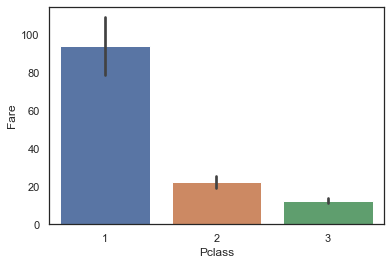

In [340]:
sn.barplot(x = 'Pclass',
            y = 'Fare',
            data = df)

# Show the plot
plt.show()

#### Fare of first class is highest, second class is medium and third class is lowest

In [341]:
df_parch = df[df.Parch >= 3]
df_parch

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
132,1024,1,3,"Lefebre, Mrs. Frank (Frances)",female,NaN,0,4,4133,25.4667,NaN,S
139,1031,0,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9000,NaN,S
142,1034,0,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
174,1066,0,3,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",male,40.0,1,5,347077,31.3875,NaN,S
178,1070,1,2,"Becker, Mrs. Allen Oliver (Nellie E Baumgardner)",female,36.0,0,3,230136,39.0000,F4,S
342,1234,0,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.5500,NaN,S
365,1257,1,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.5500,NaN,S


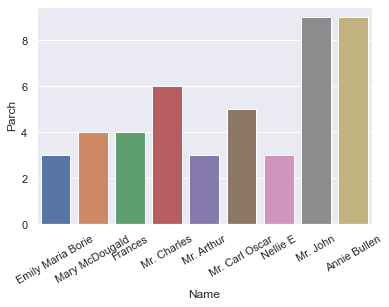

In [342]:
sn.set(style="darkgrid")
labels=['Emily Maria Borie','Mary McDougald','Frances','Mr. Charles','Mr. Arthur','Mr. Carl Oscar','Nellie E','Mr. John','Annie Bullen']
g = sn.barplot(y = 'Parch',
            x = 'Name',
            data = df_parch)
g.set_xticklabels(labels = labels, rotation=30);
# Show the plot
plt.show()

#### As can be seen putting long names even if rotated on x-axis are difficult to read and require awkward space underneath the plot

#### This can be improved using horizontal bars as shown below

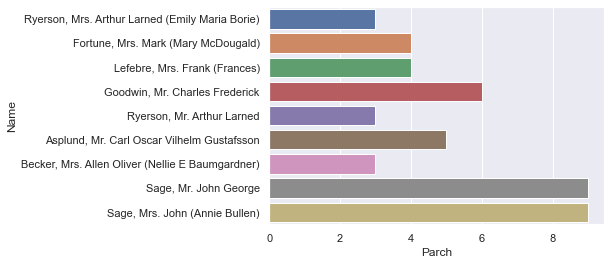

In [343]:
sn.barplot(y = 'Name',
            x = 'Parch',
            data = df_parch)

# Show the plot
plt.show()

#### Here the readability of y labels have improved but bars are arranged arbitarily.Since Parch is the number of accompaning children or parents, it can be sorted to see the who got along the largest number of children.

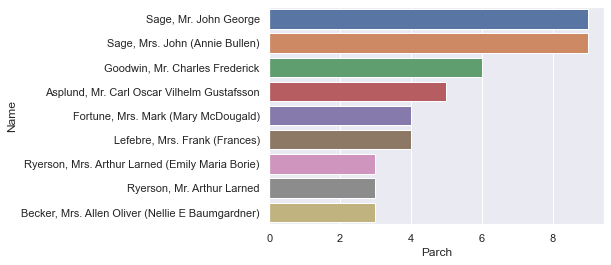

In [344]:
sn.barplot(y = 'Name',
            x = 'Parch',
            data = df_parch,
            order=df_parch.sort_values('Parch',ascending=False).Name)

# Show the plot
plt.show()

#### Sorted values show that Mr. John George and his wife Annie Bullen had 9 children (might include parent aboard) that were the highest amongst all who accompanied any person. 

In [345]:
bins = [0,20,30,40,50,60,80,100 ]
labels = ['<20','20-30','30-40','40-50','50-60','60-70','>70']
df['Age_category'] = pd.cut(x=df['Age'], bins=bins,labels=labels)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,30-40
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,40-50
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,60-70
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,20-30
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,20-30


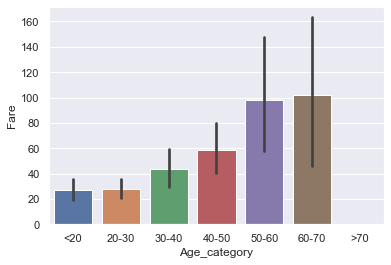

In [346]:
#df.dropna(subset=['Survive'])[['Survive','Age','Fare', 'Group_Size','deck', 'PCLass', 'Title' ]] 
sn.set(style="darkgrid")
g = sn.barplot(y = 'Fare',
            x = 'Age_category',
            data = df)
plt.show()

#### Maximum fare was paid by people of ages from 50-70 years

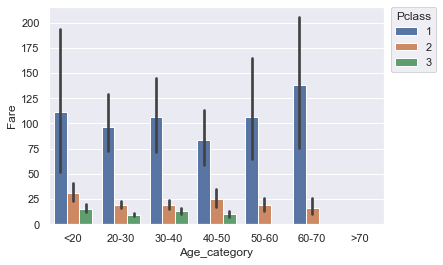

In [347]:
sn.set(style="darkgrid")
g = sn.barplot(y = 'Fare',
            x = 'Age_category',
               hue = 'Pclass',
            data = df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,title='Pclass');


#### Difference of fares amongst each class within different age categories. This doesnt make much sense as 1st class, 2nd class and 3rd class will always have same level difference for any category. That is, 3rd class will always have lower fare than 1st and 2nd class.

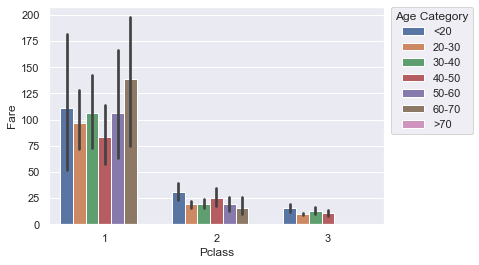

In [348]:
sn.set(style="darkgrid")
g = sn.barplot(y = 'Fare',
            x = 'Pclass',
               hue = 'Age_category',
            data = df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,title='Age Category');


#### 50-70 aged people travelled via 1st and 2nd class

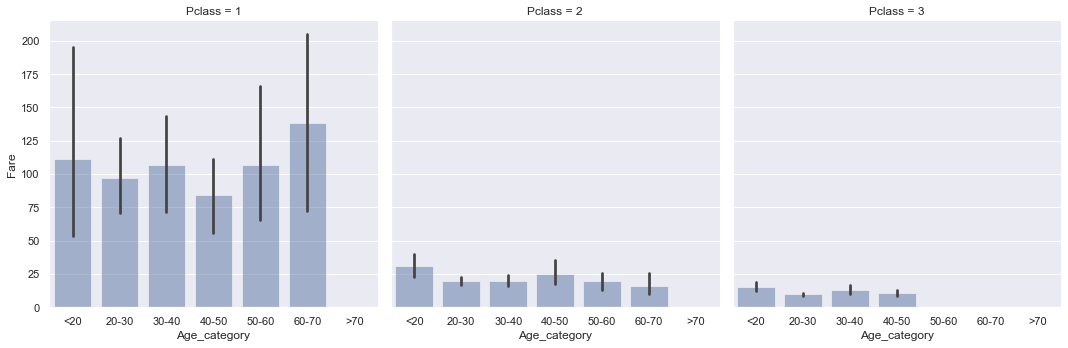

In [349]:
g = sn.FacetGrid(df, col="Pclass", height=5);
g.map(sn.barplot, "Age_category", "Fare", alpha=.5);


#### Fare verses Pclass and Age. This shows clearly distribution of travel class among different age groups. The advantage is that no need to encode either categorical variable by color bar

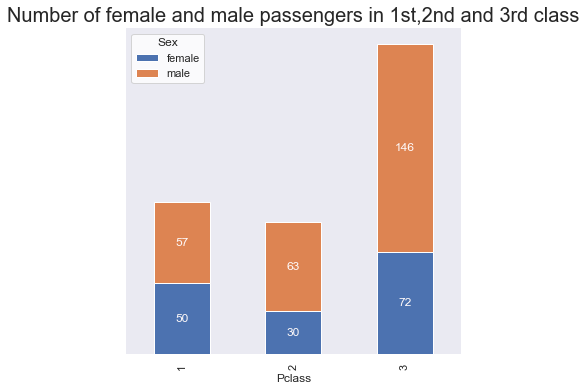

In [350]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize=(6, 6))

sn.set(style="white")
df_plot = df.groupby(['Sex', 'Pclass']).size().reset_index().pivot(columns='Sex', index='Pclass', values=0)
df_plot.plot(kind='bar', stacked=True,ax=ax)
# add the annotation
ax.bar_label(ax.containers[-1], label_type='center',color='snow')
ax.bar_label(ax.containers[0], label_type='center',color='snow')
ax.set_title("Number of female and male passengers in 1st,2nd and 3rd class",fontsize=20)
ax.set(yticklabels=[])
ax.set(ylabel=None)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


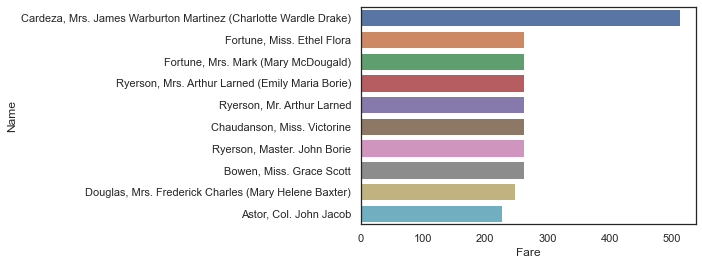

In [351]:
df_sorted = df.sort_values(by='Fare',ascending=False)[:10]
sn.barplot(y = 'Name',
            x = 'Fare',
            data = df_sorted,
            order=df_sorted.sort_values('Fare',ascending=False).Name)

# Show the plot
plt.show()

#### Confusing long bars with relatively same values.May look better with dot plot as below

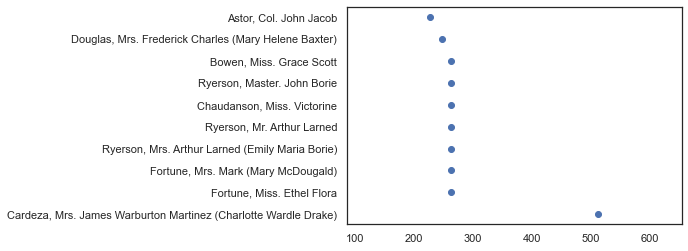

In [352]:
df_sorted = df.sort_values(by='Fare',ascending=False)[:10]
plt.scatter(data=df_sorted, x='Fare', y='Name') 
plt.margins(x=0.5)


Text(0.5, 1.0, 'Simple Heatmap')

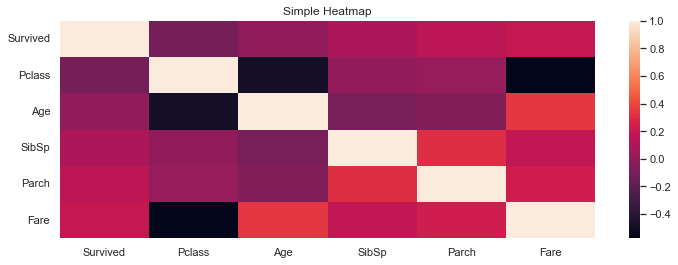

In [353]:
cols = ["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
df_corr = df[cols].corr()
fig,ax = plt.subplots(figsize=(12,4))
sn.heatmap(df_corr)
ax.set_title('Simple Heatmap')

## Q2 Chapter - 7 -Visualizing Distributions

<AxesSubplot:xlabel='Age', ylabel='Count'>

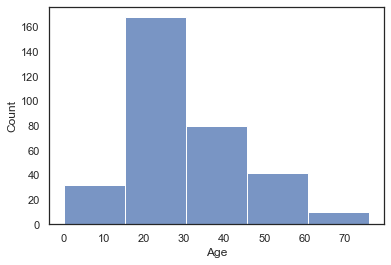

In [354]:
sn.histplot(df[df.Age.notnull()].Age,bins=5)

<AxesSubplot:xlabel='Age', ylabel='Count'>

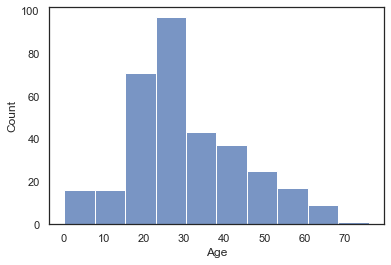

In [355]:
sn.histplot(df[df.Age.notnull()].Age,bins=10)

<AxesSubplot:xlabel='Age', ylabel='Count'>

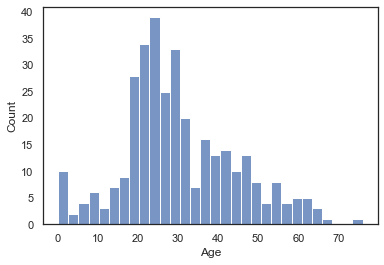

In [356]:
sn.histplot(df[df.Age.notnull()].Age,bins=30)

<AxesSubplot:xlabel='Age', ylabel='Count'>

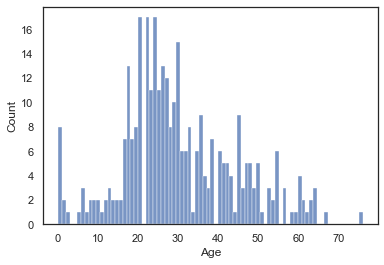

In [357]:
sn.histplot(df[df.Age.notnull()].Age,bins=80)

#### Histograms using different bin width - 5,10,30,80. Less bins, information is lost, more bins too much details, a general distribution pattern is lost. Middle is the sweet spot.

#### kdeplot to visualize underlying probability distribution of data by drawing continuous curve with varying bandwidths

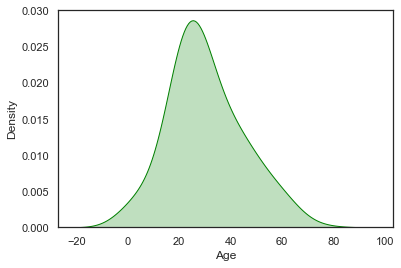

In [358]:
sn.kdeplot(df[df.Age.notnull()].Age, shade=True, bw=0.5, color="green")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

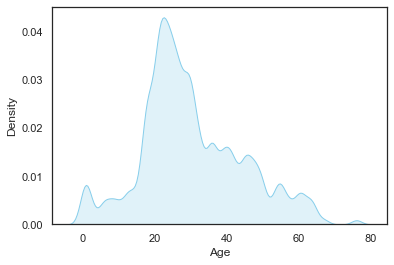

In [359]:
sn.kdeplot(df[df.Age.notnull()].Age, shade=True, bw=.1, color="skyblue")


<AxesSubplot:xlabel='Age', ylabel='Density'>

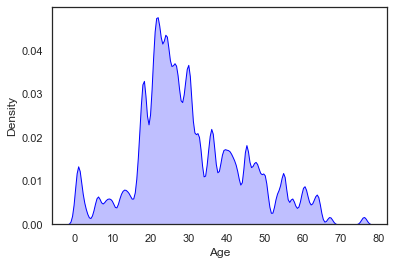

In [360]:
sn.kdeplot(df[df.Age.notnull()].Age, shade=True, bw=.05, color="blue")


<AxesSubplot:xlabel='Age', ylabel='Density'>

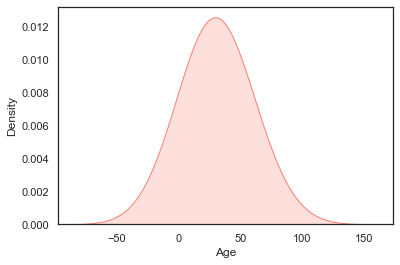

In [361]:
sn.kdeplot(df[df.Age.notnull()].Age, shade=True, bw=2, color="salmon")


#### kernel density esimates extend tails of the distribution into areas where no data exists for eg, passengers with negatiive age range. this should therefore be avoided.

Text(0, 0.5, 'Count')

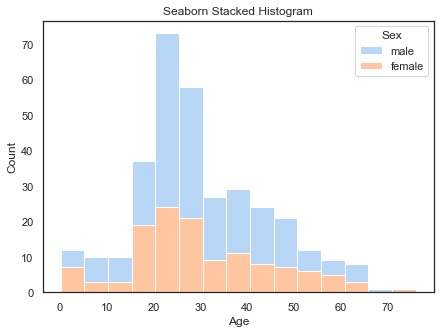

In [362]:
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(1,1,1)
sn.histplot(data=df, ax=ax, stat="count", multiple="stack",
             x="Age", kde=False,
             palette="pastel", hue="Sex",
             element="bars", legend=True)
ax.set_title("Seaborn Stacked Histogram")
ax.set_xlabel("Age")
ax.set_ylabel("Count")

#### This figure is considered bad as can be easily confused with overlapping histograms and heights of the bars representing male passengers cannot be easily compared to each other as the base of the bar is not clearly defined.

(0.0, 90.0)

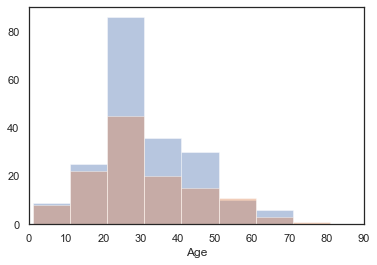

In [363]:
fig, ax = plt.subplots()
df_age = df[df.Age.notnull()]
x = df_age[df.Sex == 'male']
y = df_age[df.Sex == 'female']

for a in [x.Age, y.Age]:
    sn.distplot(a, bins=range(1, 100, 10), ax=ax, kde=False)
ax.set_xlim([0, 90])

#### The above two overlapping histograms is also not good as there is no clear visual indication that all blue bars start at a count of 0

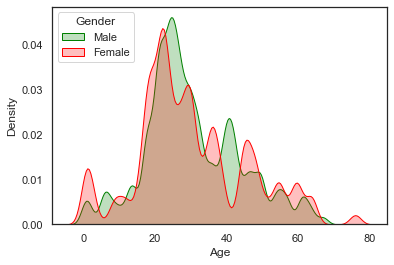

In [364]:
fig, ax = plt.subplots()
df_age = df[df.Age.notnull()]
x = df_age[df.Sex == 'male']
y = df_age[df.Sex == 'female']

sn.kdeplot(x.Age, shade=True, bw=0.10, color="green",ax=ax)
sn.kdeplot(y.Age, shade=True, bw=0.10, color="red",ax=ax)
plt.legend(title='Gender', loc='upper left', labels=['Male', 'Female'])
plt.show()

In [365]:
df_age = df[df.Age.notnull()]

df_plot = df_age.groupby(['Age_category','Sex'])
df_plot
df_plot_sz = df_plot.size().unstack()
df_plot_sz['Total'] = df_plot_sz.sum(axis=1)
df_plot_sz



Sex,female,male,Total
Age_category,,,
<20,32,37,69
20-30,45,86,131
30-40,20,35,55
40-50,15,31,46
50-60,11,9,20
60-70,4,7,11
>70,0,0,0


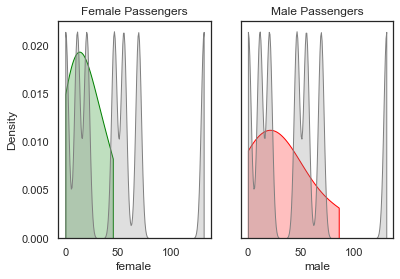

In [366]:
fig, ax = plt.subplots(nrows=1,ncols=2,sharey=True)
df_age = df[df.Age.notnull()]

df_plot = df_age.groupby(['Age_category','Sex'])
df_plot
df_plot_sz = df_plot.size().unstack()
df_plot_sz['Total'] = df_plot_sz.sum(axis=1)
df_plot_sz

sn.kdeplot(df_plot_sz['female'], shade=True, bw=0.9, color="green",cut=0,ax=ax[0])
sn.kdeplot(df_plot_sz['Total'], shade=True, bw=0.06, color="grey",cut=0,ax=ax[0])

sn.kdeplot(df_plot_sz.male, shade=True, bw=0.9, color="red",cut=0,ax=ax[1])
sn.kdeplot(df_plot_sz.Total, shade=True, bw=0.06, color="grey",cut=0,ax=ax[1])

ax[0].set_title("Female Passengers")
ax[1].set_title("Male Passengers")
plt.show()

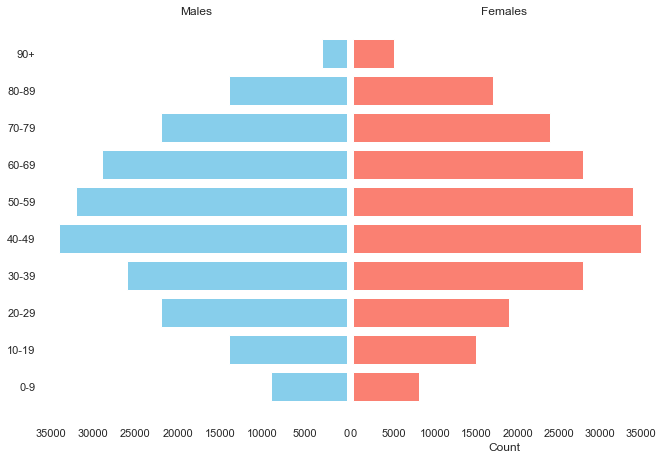

In [367]:
df1 = pd.DataFrame({'Age': ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+'], 
                    'Male': [9000, 14000, 22000, 26000, 34000, 32000, 29000, 22000, 14000, 3000], 
                    'Female': [8000, 15000, 19000, 28000, 35000, 34000, 28000, 24000, 17000, 5000]})

#define x and y limits
y = range(0, len(df1))
x_male = df1['Male']
x_female = df1['Female']

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#hrozintal bars- male and female 
axes[0].barh(y, x_male, align='center', color='skyblue')
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='salmon')
axes[1].set(title='Females')

axes[0].set(yticks=y, yticklabels=df1['Age'])
axes[0].invert_xaxis()
fig.tight_layout(pad=0.0)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['left'].set_visible(False)
plt.xlabel("Count",loc='center')

#display plot
plt.show()


#### Age distribution visualized as age pyramid

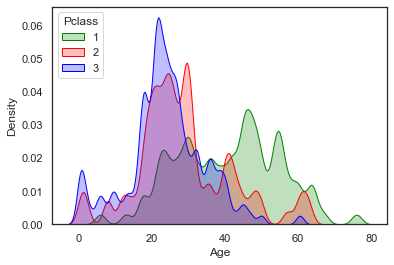

In [368]:
fig, ax = plt.subplots()
df_age = df[df.Age.notnull()]
x = df_age[df['Pclass'] == 1]
y = df_age[df.Pclass == 2]
z = df_age[df.Pclass == 3]

sn.kdeplot(x.Age, shade=True, bw=0.10, color="green",ax=ax)
sn.kdeplot(y.Age, shade=True, bw=0.10, color="red",ax=ax)
sn.kdeplot(z.Age, shade=True, bw=0.10, color="blue",ax=ax)

plt.legend(title='Pclass', loc='upper left', labels=['1', '2','3'])
plt.show()

#### Density estimates of age across three passenger classes

## Q3 - chapter - 8 -Visualizing Distributions (Emperical Cumulative Distribution and Q-Q plots)

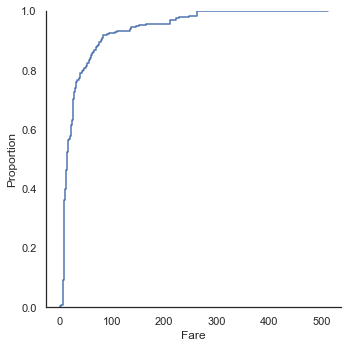

In [369]:
sn.displot(data=df, x="Fare", kind="ecdf")

#### 100-80 = 20% paid most of the money from 50 till greater than 500.

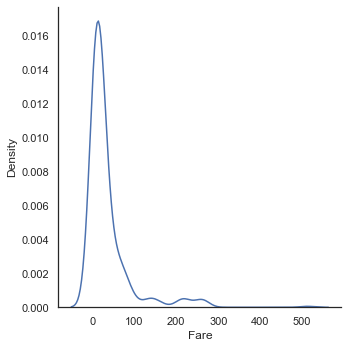

In [370]:
sn.displot(df.Fare,kind='kde')

#### Fare distribution has a very long tail

In [371]:
print(df.Fare.median(),df.Fare.mean(),df.Fare.min(),df.Fare.max())

14.4542 35.6271884892086 0.0 512.3292


#### Very heavily right skewed distribution

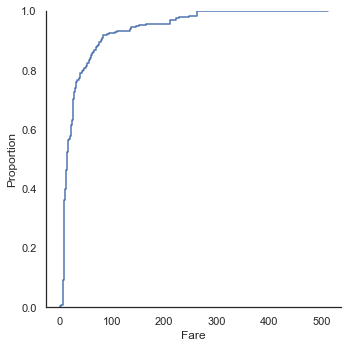

In [372]:
sn.displot(data=df, x="Fare", kind="ecdf")

#### Density plot shows a sharp peak right at 0 and virtually no details of the distribution are visible.Therefore, we can perform log normal transformation to this column

In [373]:
df['Fare_log10'] = np.log10(df['Fare'])

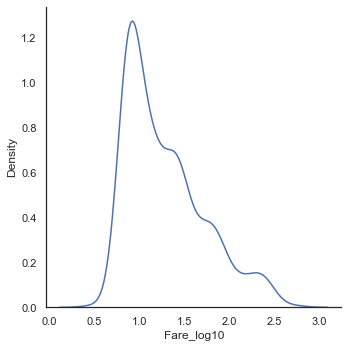

In [374]:
sn.displot(df.Fare_log10,kind='kde')

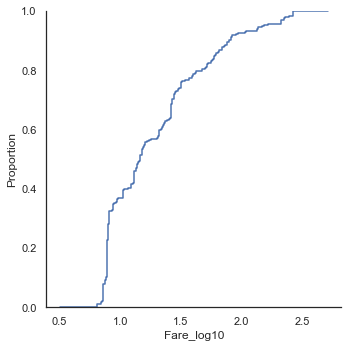

In [375]:
sn.displot(data=df, x="Fare_log10", kind="ecdf")

#### The shapes of normal distribution and Sigmoid has improved after applying log tranformation

<AxesSubplot:xlabel='Fare_log10', ylabel='Proportion'>

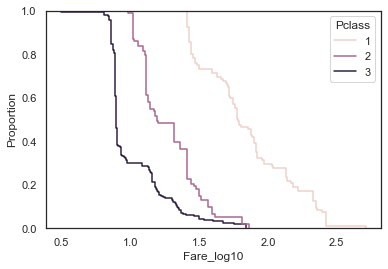

In [376]:
sn.ecdfplot(data=df, x="Fare_log10", hue="Pclass", complementary=True)

#### This graph shows proportion of fare that was bought at least that many times in Titanic across the classes verses the fare. Also, PClass 1 follows slight power law more than class 2 and class 3. 

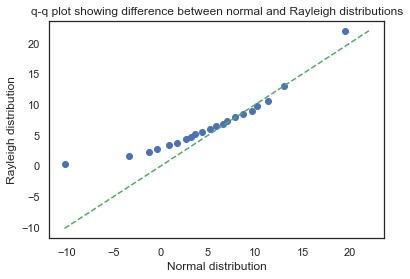

In [377]:
norm_dist = np.random.normal(5,5,250)
rayleigh_dist = np.random.rayleigh(5,250)


percs = np.linspace(0,100,21)
#print(percs)
qn_norm_dist = np.percentile(norm_dist, percs) # calculate quantile for norm_dist

qn_rayleigh_dist = np.percentile(rayleigh_dist, percs) # calculate quantile for rayleigh_dist

plt.plot(qn_norm_dist,qn_rayleigh_dist, ls="", marker="o")

x = np.linspace(np.min((qn_norm_dist.min(),qn_rayleigh_dist.min())), np.max((qn_norm_dist.max(),qn_rayleigh_dist.max())))
plt.plot(x,x, color="g", ls="--")
plt.title('q-q plot showing difference between normal and Rayleigh distributions')
plt.xlabel('Normal distribution')
plt.ylabel('Rayleigh distribution')

plt.show()

#### Q-Q plots show that how similar are the two distribution.If they match then the points must lie on the straight line which is x=y

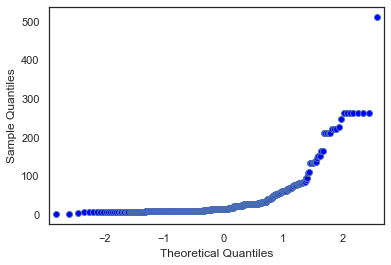

In [378]:
import statsmodels.api as sm
sm.qqplot(df['Fare'])
plt.show()

#### Fare attribute doesnot fully follow normal distribution

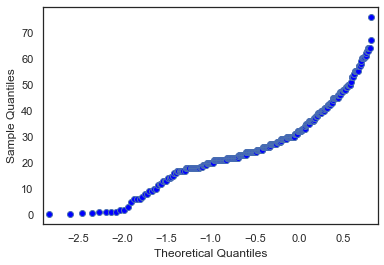

In [379]:
sm.qqplot(df['Age'])
plt.show()

#### Age attribute follows normal distribution better than Fare

## Q4 - chapter - 9 Visualizing many distributions at once

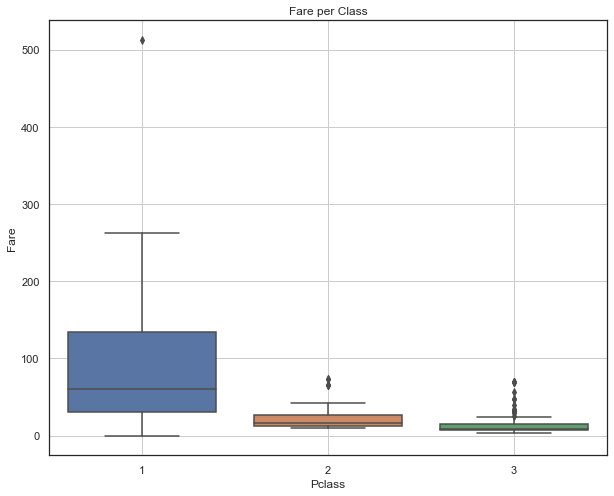

In [380]:
f,ax=plt.subplots(figsize=(10, 8))

sn.boxplot(df.Pclass,df.Fare,ax=ax)
#ax[1].plot(df_month.index,celsius_2)

ax.set_xlabel("Pclass")
ax.set_ylabel('Fare')
ax.set_title('Fare per Class')
ax.grid(True)

plt.show()

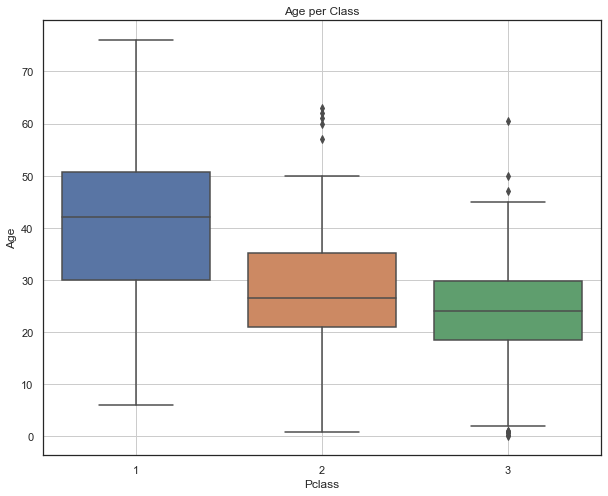

In [381]:
f,ax=plt.subplots(figsize=(10, 8))

sn.boxplot(df.Pclass,df.Age,ax=ax)
#ax[1].plot(df_month.index,celsius_2)

ax.set_xlabel("Pclass")
ax.set_ylabel('Age')
ax.set_title('Age per Class')
ax.grid(True)

plt.show()

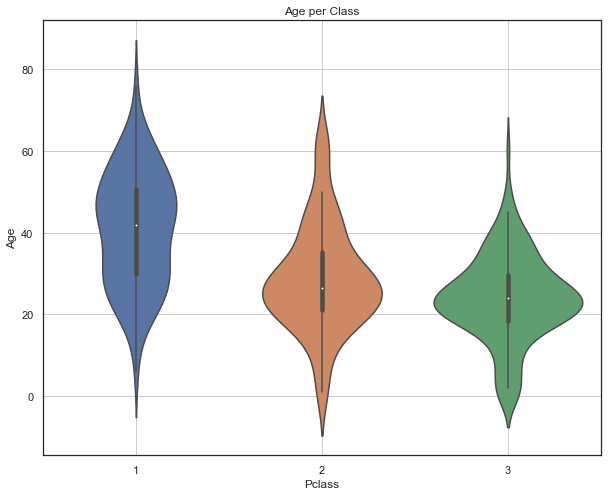

In [382]:
f,ax=plt.subplots(figsize=(10, 8))

sn.violinplot(df.Pclass,df.Age,ax=ax)
#ax[1].plot(df_month.index,celsius_2)

ax.set_xlabel("Pclass")
ax.set_ylabel('Age')
ax.set_title('Age per Class')
ax.grid(True)

plt.show()

#### Class 1 seem to be bimodal data.Two clusters of ages around 50 and 28 

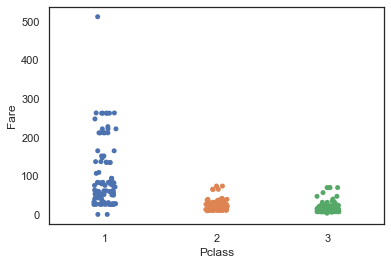

In [383]:
sn.stripplot(x="Pclass", y="Fare", data=df)
  
plt.show()

#### Using Temperature dataset

In [384]:
#Load the data
df_temp = pd.read_csv("city_temperature.csv")
df_temp.head()
df_temp.tail()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8
2906326,North America,US,Additional Territories,San Juan Puerto Rico,7,31,2013,83.6


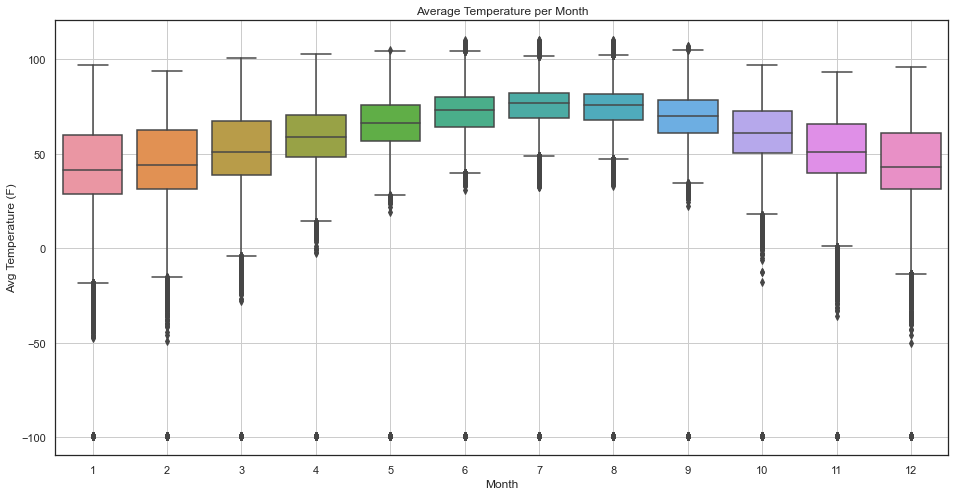

In [385]:
f,ax=plt.subplots(figsize=(16, 8))

sn.boxplot(df_temp.Month,df_temp.AvgTemperature,ax=ax)

ax.set_xlabel("Month")
ax.set_ylabel('Avg Temperature (F)')
ax.set_title('Average Temperature per Month')
ax.grid(True)

plt.show()

#### Average temperature per month visualized as boxplots. From June to August experience high temperatures. Dec and Jan are showing lower mean temperatures

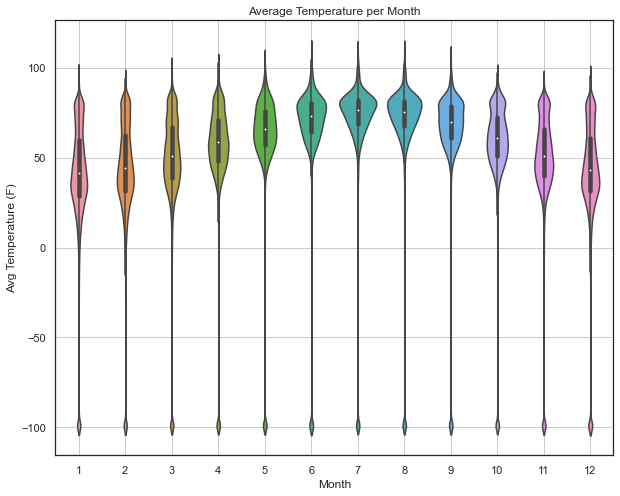

In [386]:
f,ax=plt.subplots(figsize=(10, 8))

sn.violinplot(df_temp.Month,df_temp.AvgTemperature,ax=ax)

ax.set_xlabel("Month")
ax.set_ylabel('Avg Temperature (F)')
ax.set_title('Average Temperature per Month')
ax.grid(True)

plt.show()

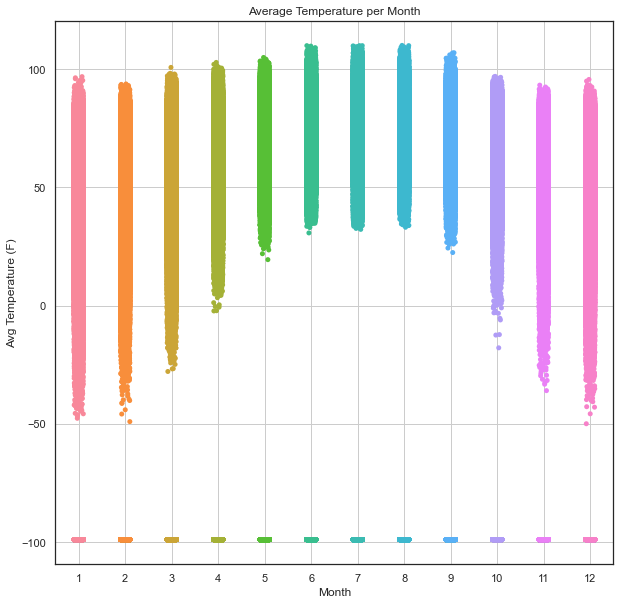

In [387]:
f,ax=plt.subplots(figsize=(10, 10))

sn.stripplot(x=df_temp.Month, y=df_temp.AvgTemperature, data=df_temp,ax=ax)
ax.set_xlabel("Month")
ax.set_ylabel('Avg Temperature (F)')
ax.set_title('Average Temperature per Month')
ax.grid(True)
  
plt.show()

#### Average temperatures using Strip Plot without jitters

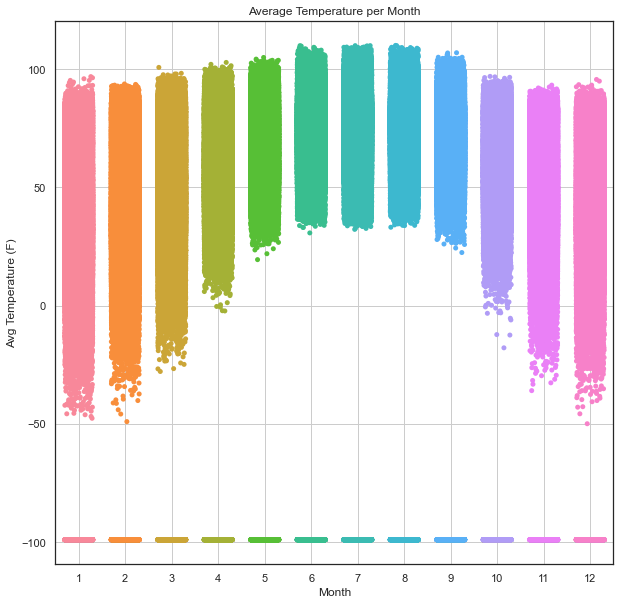

In [388]:
f,ax=plt.subplots(figsize=(10, 10))

sn.stripplot(x=df_temp.Month, y=df_temp.AvgTemperature, data=df_temp,jitter=0.3,ax=ax)
ax.set_xlabel("Month")
ax.set_ylabel('Avg Temperature (F)')
ax.set_title('Average Temperature per Month')
ax.grid(True)

plt.show()

#### Average temperatures using Strip Plot by adding jitter along x-axis

In [389]:
# we define a dictionary with months that we'll use later
month_dict = {1: 'january',
              2: 'february',
              3: 'march',
              4: 'april',
              5: 'may',
              6: 'june',
              7: 'july',
              8: 'august',
              9: 'september',
              10: 'october',
              11: 'november',
              12: 'december'}

# we create a 'month' column
df_temp['Month'] = df_temp['Month'].map(month_dict)


# we generate a pd.Series with the mean temperature for each month for all regions by creating a new column in df_temp dataframe
month_mean_series = df_temp.groupby('Month')['AvgTemperature'].mean()
#print("bb",month_mean_series)
df_temp['mean_month'] = df_temp['Month'].map(month_mean_series)
#df_temp

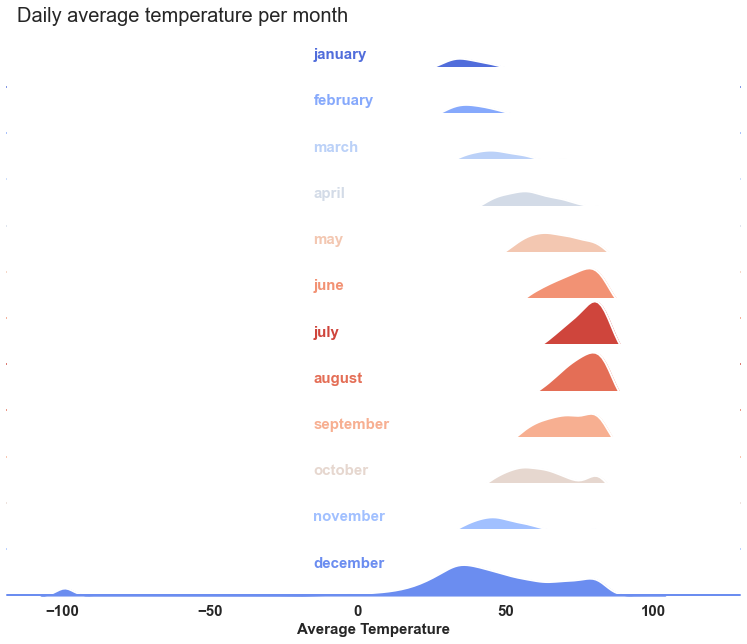

In [390]:
# we generate a color palette with Seaborn.color_palette()
pal = sn.color_palette(palette='coolwarm', n_colors=12)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sn.FacetGrid(df_temp, row='Month', hue='mean_month', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sn.kdeplot, 'AvgTemperature',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sn.kdeplot, 'AvgTemperature', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.set(ylabel=None)
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Average Temperature', fontweight='bold', fontsize=15)
g.fig.suptitle('Daily average temperature per month',
               ha='right',
               fontsize=20,
               fontweight=20)

plt.show()

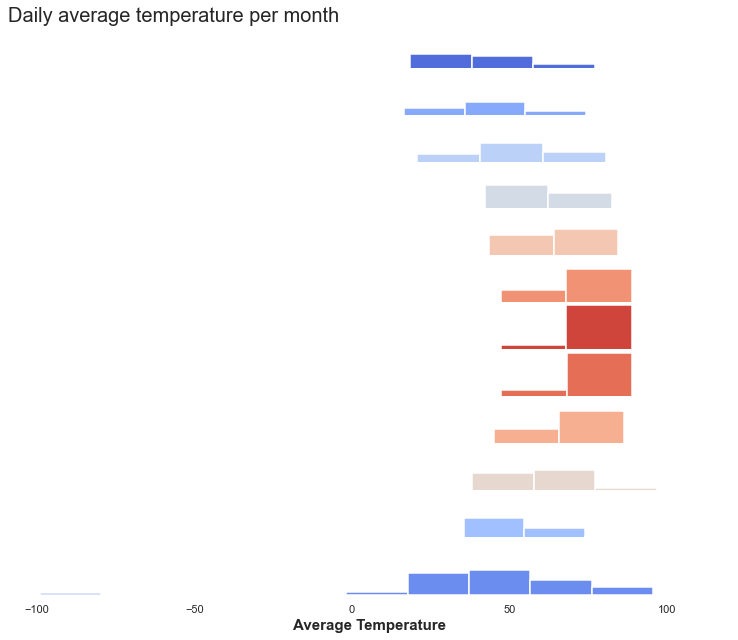

In [391]:
# we generate a color palette with Seaborn.color_palette()
pal = sn.color_palette(palette='coolwarm', n_colors=12)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sn.FacetGrid(df_temp, row='Month', hue='mean_month', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sn.histplot, 'AvgTemperature',
      bins=10,clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
 
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.2)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.set(ylabel=None)
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Average Temperature', fontweight='bold', fontsize=15)
g.fig.suptitle('Daily average temperature per month',
               ha='right',
               fontsize=20,
               fontweight=20)

plt.show()

#### Clearly not a good idea to use histogram instead of density plots in ridgeline visualization.

In [392]:
df_alg = df_temp.loc[df_temp['City'] == 'Algiers']
df_alg
df_lon = df_temp.loc[df_temp['City'] == 'London']
df_lon
df_alg_lon = pd.concat([df_alg, df_lon])
df_alg_lon

,Region,Country,State,City,Month,Day,Year,AvgTemperature,mean_month
0,Africa,Algeria,NaN,Algiers,january,1,1995,64.2,40.592510
1,Africa,Algeria,NaN,Algiers,january,2,1995,49.4,40.592510
2,Africa,Algeria,NaN,Algiers,january,3,1995,48.8,40.592510
3,Africa,Algeria,NaN,Algiers,january,4,1995,46.4,40.592510
4,Africa,Algeria,NaN,Algiers,january,5,1995,47.9,40.592510
...,...,...,...,...,...,...,...,...,...
996096,Europe,United Kingdom,NaN,London,may,9,2020,64.1,62.122887
996097,Europe,United Kingdom,NaN,London,may,10,2020,54.1,62.122887
996098,Europe,United Kingdom,NaN,London,may,11,2020,47.0,62.122887
996099,Europe,United Kingdom,NaN,London,may,12,2020,48.9,62.122887


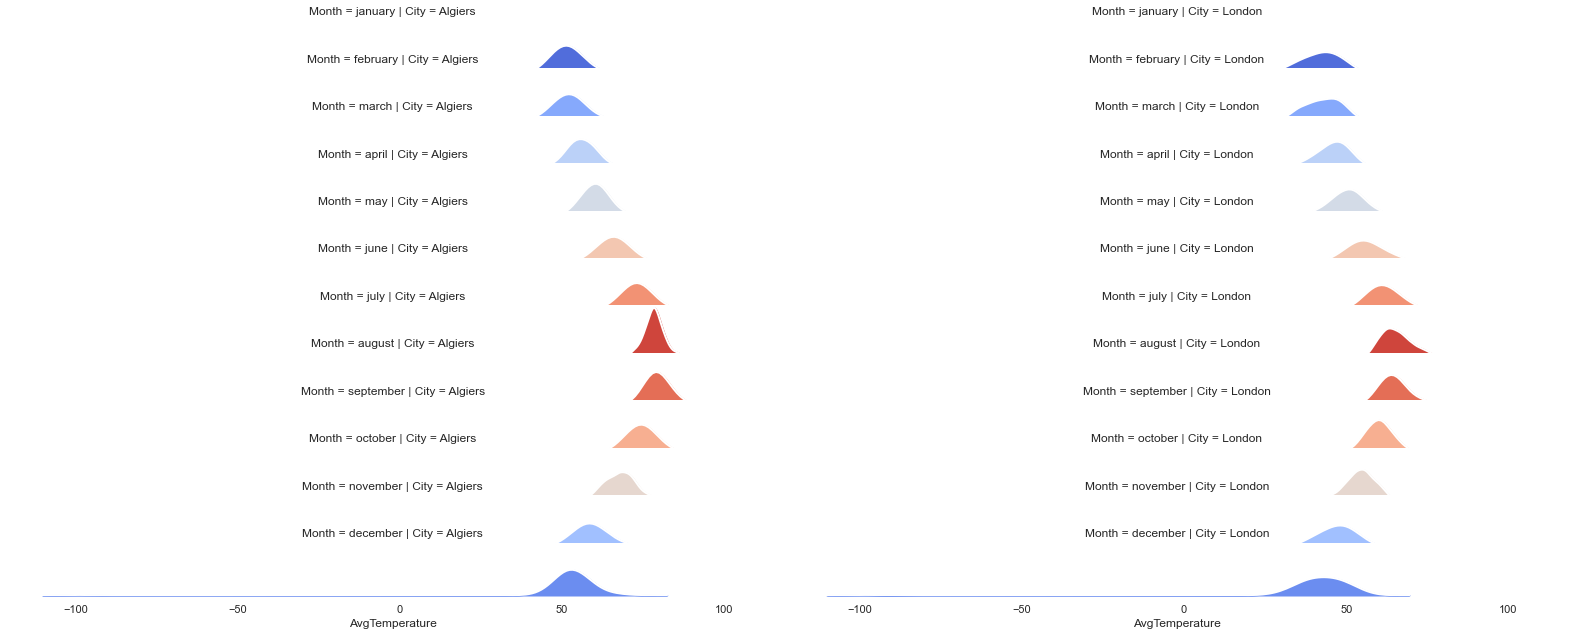

In [393]:
# we generate a color palette with Seaborn.color_palette()
pal = sn.color_palette(palette='coolwarm', n_colors=12)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sn.FacetGrid(df_alg_lon, row='Month', col='City',hue='mean_month', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sn.kdeplot, 'AvgTemperature',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sn.kdeplot, 'AvgTemperature', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)
  
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.1)

# eventually we remove axes titles, yticks and spines
g.set(yticks=[])
g.set(ylabel=None)
g.despine(bottom=True, left=True)

plt.show()

#### Temperature distribution between Algeirs( Africa) and London (UK). Here temperature densities are more peaked for Algeirs and more rounded for London. specially in August most of the month in algeirs has similar higher mean temperature following gaussian distribution whereas in London the distribution is right skewed and intial days tend to have higher temperatures than mid to later august days 